<a href="https://colab.research.google.com/github/Vibsgremlin/Colab/blob/main/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

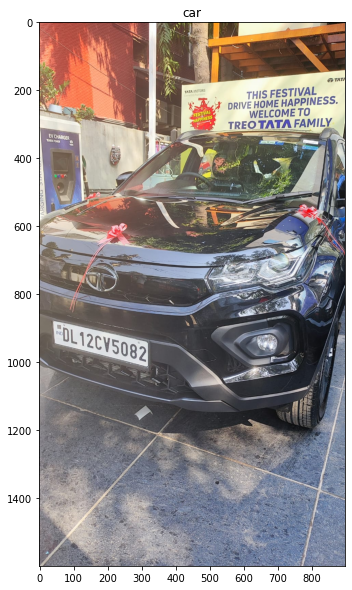

text:  TAT

THIS FESTIVAL
DRIVE HOME HAPPINESS.
WELCOME TO
FAMILY




In [ ]:
img= cv.imread('car.jpeg')
imshow('car',img)

out_text= pytesseract.image_to_string(img)
print('text: ',out_text)

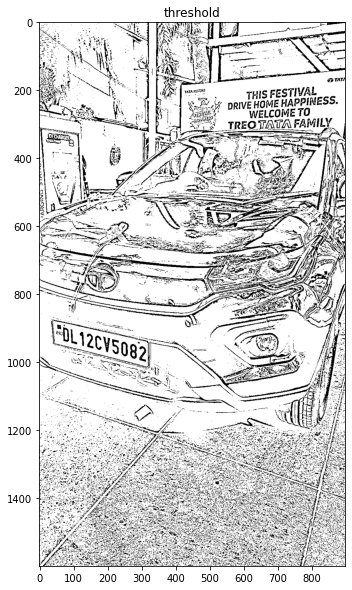

tessearct extracted: ap TAT

THIS FESTIVAL
DRIVE HOME HAPPINESS.

WELCOME TO
TREO TATA FAMILY




In [ ]:
from skimage.filters import threshold_local

img= cv.imread('car.jpeg')

v= cv.split(cv.cvtColor(img,cv.COLOR_BGR2HSV))[2]
T= threshold_local(v,25,offset=15,method='gaussian')

thresh= (v>T).astype('uint8')*255
imshow('threshold',thresh)

out_text= pytesseract.image_to_string(thresh)
print('tessearct extracted: {}'.format(out_text))

In [ ]:
from pytesseract import Output

d= pytesseract.image_to_data(thresh, output_type= Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


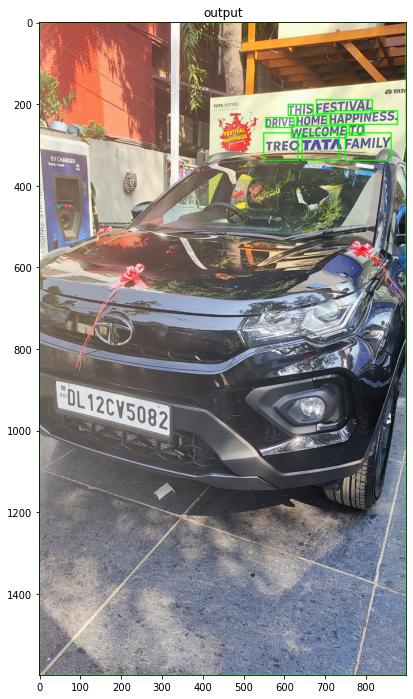

In [ ]:
n_boxes= len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i])>60:
        (x,y,w,h)=(d['left'][i],d['top'][i],d['width'][i],d['height'][i])
        img= cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        # cv.putText(img,str(d['text']),(x,y-5),cv.FONT_HERSHEY_COMPLEX,,(255,0,0))

imshow('output',img,size=12)

Using CPU. Note: This module is much faster with a GPU.


[INFO] 0.4720: TATI
[INFO] 0.5818: IATA
[INFO] 0.6654: THIS FESTIVAL
[INFO] 0.8488: DRIVE HOME HAPPINESS.
[INFO] 0.8207: WELCOME TO
[INFO] 0.7120: TREOTATA FAMILY
[INFO] 0.6742: ؟
[INFO] 0.2111: ||01015
[INFO] 0.0336: LBST| 
[INFO] 0.0282: 2P;1!55
[INFO] 0.5218: ٧ ٥
[INFO] 0.0260: IATA7
[INFO] 0.5204: "0L12c٧5082


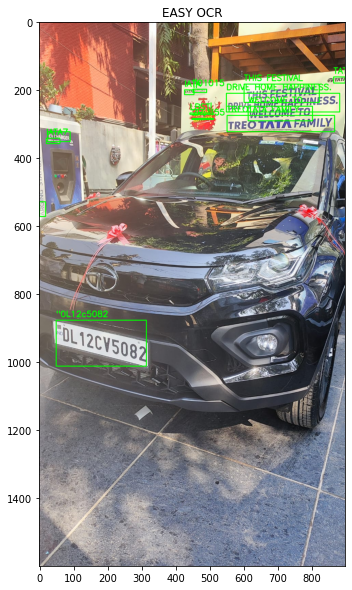

EASY OCR Extracted: "0L12c5082


In [ ]:
import cv2 as cv
from easyocr import Reader
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def clean_text(text):
	# remove non-ASCII text so we can draw the text on the image
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv.imread('car.jpeg')

reader = Reader(["en","ar"], gpu=False)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# clean text and draw the box surrounding the text along
	text = clean_text(text)
	cv.rectangle(image, tl, br, (0, 255, 0), 2)
	cv.putText(image, text, (tl[0], tl[1] - 10),
		cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation
#thresh = (V > T).astype("uint8") * 255
imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))